<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    degrees=[2, 3]
    kernels = ['linear', 'rbf', 'poly']
    Cs=[0.1,1,10,100,1000,10000]
     
               
    for kernel in kernels:
        for c in Cs:
            for degree in degrees:
                if(kernel!='poly' and degree==2):
                    continue
                model = SVC(kernel=kernel, C=c, degree=degree)
                print "Trying model {}".format(model)
                accuracy = np.mean(cross_val_score(model, x, y, n_jobs=4, cv=10))
                if(best_accuracy<accuracy):
                    best_accuracy = accuracy
                    best_model = model
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Tr

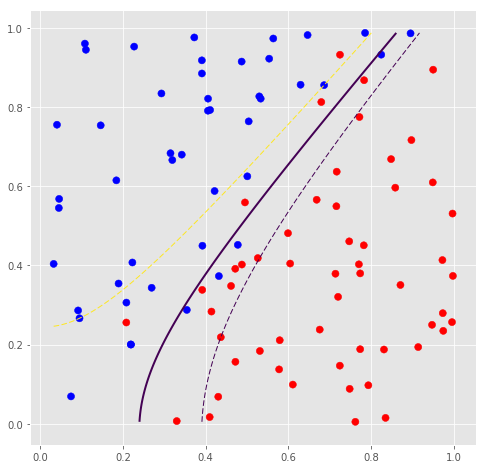

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Tr

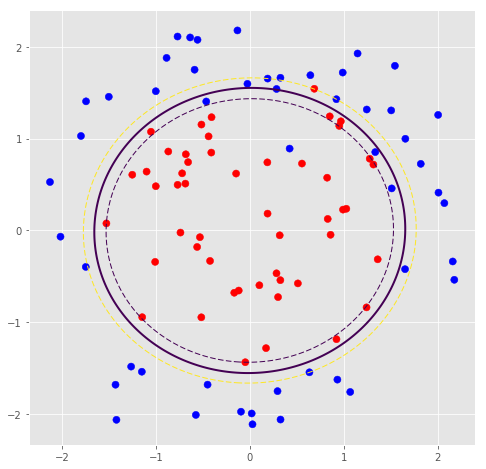

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Tryin

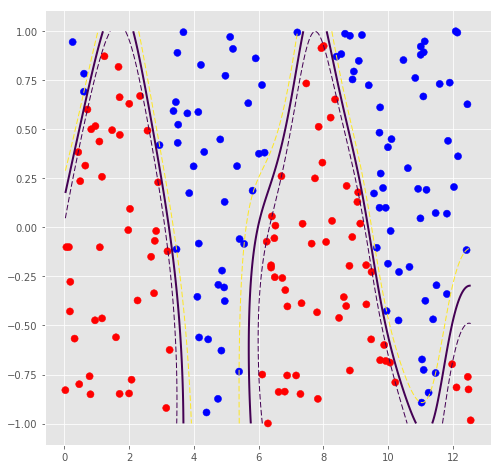

In [6]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [7]:
# Your Code Here
df_data = pd.read_csv('titanium.csv', sep=',')
df_data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [8]:
df_data=(df_data - df_data.mean())/df_data.std()

In [9]:
df_data.head()

,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


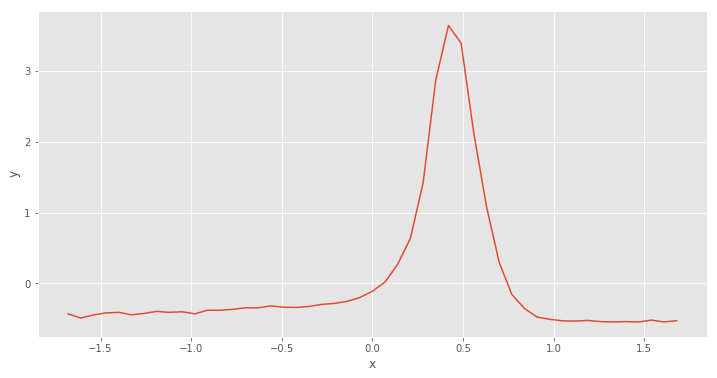

In [10]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df_data['x'].values, df_data['y'].values)
plt.show()

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [13]:
X_train = df_data['x'].values
y_train = df_data['y'].values

In [17]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [19]:
from sklearn.metrics import mean_absolute_error
C=np.logspace(-2, 2, 10)
errors = np.zeros(len(C))
best_C = 0
best_error = 10000000
for i in range(len(C)):
    svr_lin = SVR(kernel='linear', epsilon=0.01, C=C[i])
    svr_lin.fit(X_train, y_train)
    y_pred = svr_lin.predict(X_train)
    errors[i] = mean_absolute_error(y_train.ravel(), y_pred)
    if(best_error>errors[i]):
        best_error=errors[i]
        best_C=C[i]
print best_C

0.01


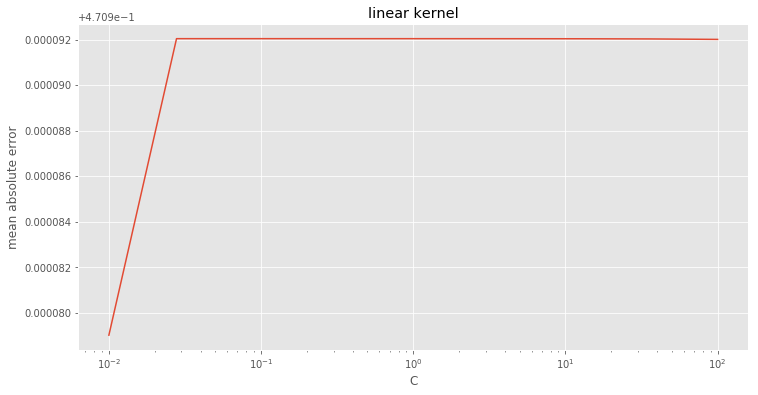

In [20]:
plt.title('linear kernel')
plt.xlabel('C')
plt.ylabel('mean absolute error')
plt.semilogx(C, errors)
plt.show()

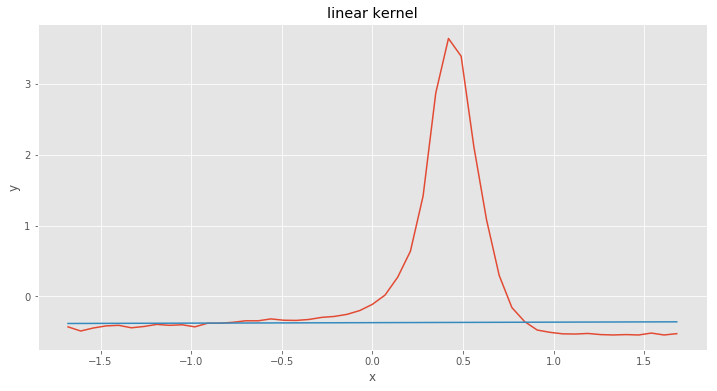

In [21]:
svr_lin = SVR(kernel='linear', epsilon=0.01, C=best_C)
svr_lin.fit(X_train, y_train)
y_pred = svr_lin.predict(X_train)
plt.title('linear kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_train, y_train)
plt.plot(X_train, y_pred)
plt.show()

100.0


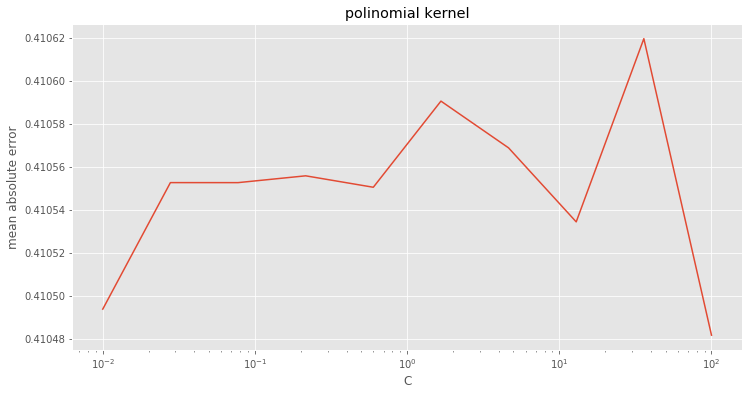

In [26]:
#Полиномиальное ядро
errors = np.zeros(len(C))
best_C = 0
best_error = 10000000
for i in range(len(C)):
    svr_poly = SVR(kernel='poly', epsilon=0.01,  degree = 3, gamma = 6, coef0 = 1, C=C[i])
    svr_poly.fit(X_train, y_train)
    y_pred = svr_poly.predict(X_train)
    errors[i] = mean_absolute_error(y_train.ravel(), y_pred)
    if(best_error>errors[i]):
        best_error=errors[i]
        best_C=C[i]
print best_C

plt.title('polinomial kernel')
plt.xlabel('C')
plt.ylabel('mean absolute error')
plt.semilogx(C, errors)
plt.show()

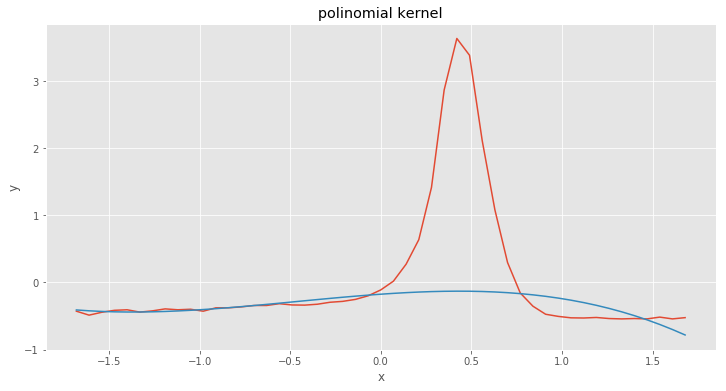

In [27]:
#Ошибка в зависимости от C выше изменяется в четвёртом знаке после запятой
svr_poly = SVR(kernel='poly', epsilon=0.01, degree = 3, gamma = 6, coef0 = 1, C=best_C)
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_train)
plt.title('polinomial kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_train, y_train, )
plt.plot(X_train, y_pred)
plt.show()

100.0


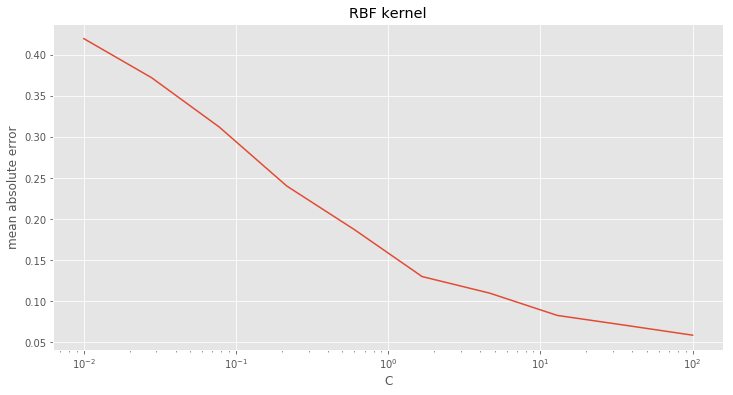

In [31]:
#Ядро RBF
errors = np.zeros(len(C))
best_C = 0
best_error = 10000000
for i in range(len(C)):
    svr_rbf = SVR(kernel='rbf', epsilon=0.01, gamma = 6, coef0 = 1, C=C[i])
    svr_rbf.fit(X_train, y_train)
    y_pred = svr_rbf.predict(X_train)
    errors[i] = mean_absolute_error(y_train.ravel(), y_pred)
    if(best_error>errors[i]):
        best_error=errors[i]
        best_C=C[i]
print best_C

plt.title('RBF kernel')
plt.xlabel('C')
plt.ylabel('mean absolute error')
plt.semilogx(C, errors)
plt.show()

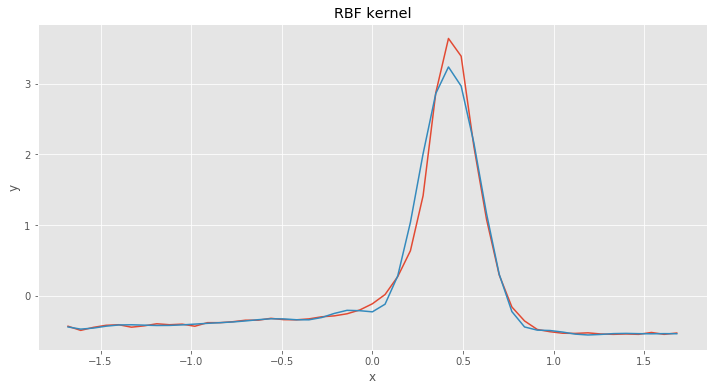

In [32]:
svr_rbf = SVR(kernel='rbf', epsilon=0.01, gamma = 6, coef0 = 1, C=best_C)
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_train)
plt.title('RBF kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_train, y_train)
plt.plot(X_train, y_pred)
plt.show()

Можно сделать такой вывод, что модель с линейным и полиномиальным ядром недообучилась,
в то время как с ядром RBF, возможно, немного переобучилась (может быть, острый пик на вершине графика в реальности не такой острый)

In [ ]:
## Your Code Here

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [153]:
## Your Code Here
import re
file_en = open('war_and_peace_en.txt', 'r')
file_es = open('war_and_peace_es.txt', 'r')
text_en = file_en.read().lower()
text_es = file_es.read().lower()
file_en.close()
file_es.close()
text_en = re.sub('[^a-z\ \']+', " ", text_en)
text_es = re.sub('[^a-z\ \']+', " ", text_es)
words_en = pd.Series(list(text_en.split()))
words_es = pd.Series(list(text_es.split()))


In [154]:
words_en = words_en.unique()
words_es = words_es.unique()

In [155]:
df_en = pd.DataFrame(words_en, columns=['word'])
df_es = pd.DataFrame(words_es, columns=['word'])

In [156]:
len(words_en)

1530

In [157]:
df_en['label'] = 1
df_es['label'] = 0

In [158]:
df_es.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [159]:
df = pd.concat([df_en, df_es], ignore_index=True)

In [160]:
# like this

df.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


In [161]:
df.tail()

,word,label
3987,sugli,0
3988,spettacoli,0
3989,teatrali,0
3990,sarebbero,0
3991,ritrovati,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [162]:
from sklearn.cross_validation import train_test_split

In [163]:
RND_SEED = 42

In [164]:
df = df.sample(1000, random_state=RND_SEED)
df.head()

,word,label
1487,mothers,1
2097,degni,0
2987,pronto,0
864,girdled,1
2342,pensato,0


In [165]:
df.reset_index(drop=True, inplace=True)

In [166]:
df.head()

,word,label
0,mothers,1
1,degni,0
2,pronto,0
3,girdled,1
4,pensato,0


In [167]:
df['index']=range(df.shape[0])

In [168]:
df.tail()

,word,label,index
995,giusto,0,995
996,opinioni,0,996
997,trov,0,997
998,this,1,998
999,imbecille,0,999


In [169]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=RND_SEED)

In [170]:
df_train.head()

,word,label,index
24,obtained,1,24
467,wanted,1,467
539,vestita,0,539
531,infamies,1,531
618,grandfathers,1,618


In [171]:
X_train, y_train = df_train['index'].values, df_train['label'].values
X_test, y_test = df_test['index'].values, df_test['label'].values

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [172]:
import Levenshtein as lev

In [173]:
#Поскольку всё равно используется предпосчитанная матрица ядра, всё же удобнее не пользоваться индексами слов,
#к оперативной памяти меньше обращаться
X_train_w, y_train_w = df_train['word'].values, df_train['label'].values
X_test_w, y_test_w = df_test['word'].values, df_test['label'].values

In [174]:
def string_kernel(U, V, gamma=0.1):
    #Your Code Here
    #в качестве ядра можно использовать radial basis function с расстоянием Леветштейна
    G=np.zeros((U.shape[0], V.shape[0]), dtype=float)
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            dist = lev.distance(U[i], V[j])
            G[i, j]=np.exp(-gamma*dist*dist)
    return G
                           
G = string_kernel(X_train_w, X_train_w)

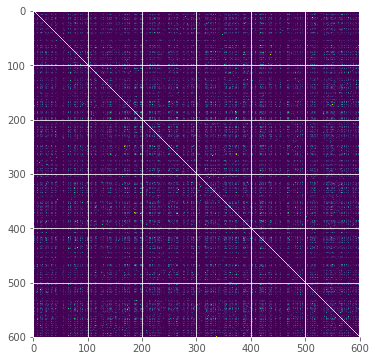

In [175]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [176]:
from sklearn.metrics import accuracy_score

In [177]:
# Your Code Here
model = SVC(kernel='precomputed')
model.fit(G, y_train_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [178]:
y_pred_train = model.predict(G)

In [179]:
print accuracy_score(y_train_w, y_pred_train)

0.94


In [180]:
G_test = string_kernel(X_test_w, X_train_w)

In [181]:
y_pred_test = model.predict(G_test)

In [182]:
#Без какого либо подбора параметров получается неплохое значение. Не очень понял пункт про постараться достичь 70%.
#Хотя модель переобученная, судя по очкам выше на тренировочном сете
print accuracy_score(y_test_w, y_pred_test)

0.7725


In [187]:
#Попробуем разные значения С (возьмём значения как в первой части задания)
C=np.logspace(-2, 2, 10)
scores_train = np.zeros(len(C))
scores_test = np.zeros(len(C))
for i in range(len(C)):
    model = SVC(kernel='precomputed', C=C[i])
    model.fit(G, y_train_w)
    y_pred_train = model.predict(G)
    y_pred_test = model.predict(G_test)
    scores_train[i] = accuracy_score(y_train_w, y_pred_train)
    scores_test[i] = accuracy_score(y_test_w, y_pred_test)

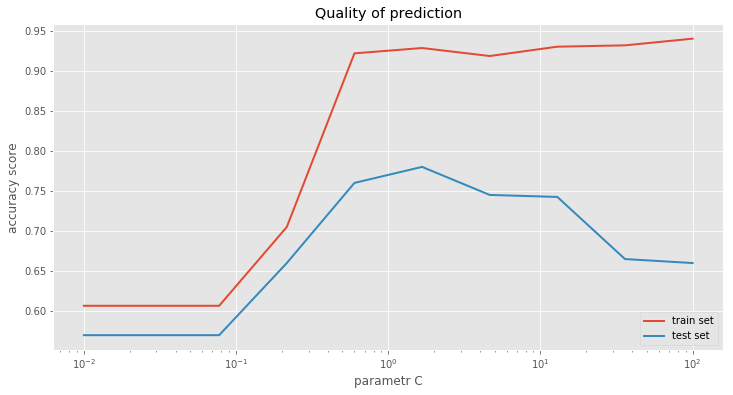

In [189]:
plt.title('Quality of prediction')
plt.xlabel('parametr C')
plt.ylabel('accuracy score')
plt.semilogx(C, scores_train, lw=2, label='train set')
plt.semilogx(C, scores_test, lw=2, label='test set')
plt.legend(loc="lower right")
plt.show()

Как видно на графике, лучшее значение С как раз лежит в районе единицы. Можно ещё оптимизировать параметр gamma при расчёте ядра.